### Simple graph Ai Agent

### Step 1: Understand the Project

This project defines a **stateful workflow graph** using LangGraph. It processes and updates shared data as it moves through different nodes.

- **State**: A dictionary containing `graph_msg`, which stores a message that gets updated at each step.
- **Nodes**: Three functions (`node_01`, `node_02`, `node_03`) that print the current value of `graph_msg` and then append their node name to it.
- **Routing Logic**: After executing `node_01`, the graph randomly chooses to go to either `node_02` or `node_03`.
- **Graph Visualization**: The workflow structure is displayed using Mermaid diagram rendering.


### Step 2: Installation and Setup

In [30]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_anthropic

### Step 3: Import Libraries and Define the State/Nodes

In [31]:
from typing import TypedDict
import random
from typing import Literal
from langgraph.graph import StateGraph,END,START
from IPython.display import display,Image
from datetime import datetime

In [34]:
class State(TypedDict):
    graph_msg: str
def node_o1(state: State):
    timestapm = datetime.now().isoformat()
    print(f"[{timestamp}] Node 01: {state['graph_msg']}")
    return {"graph_msg": state['graph_msg'] + "node_01"}

def node_02(state: State):
    timestamp = datetime.now().isoformat()
    print(f"[{timestamp}] Node 02: {state['graph_msg']}")
    return {"graph_msg": state['graph_msg'] + "node_02"}

def node_03(state: State):
    timestamp = datetime.now().isoformat()
    print(f"[{timestamp}] Node 03: {state['graph_msg']}")
    return {"graph_msg": state['graph_msg'] + "node_03"}


***Next cell: Define the conditional router***

In [35]:
def select_next_node(state: State) -> Literal["node_02","node_03"]:
    next_node = random.choice(["node_02","node_03"])
    timestamp =datetime.now().isoformat()
    print(f"[{timestamp}] Selected node: {next_node}")

### Step 4: Build and Compile the Graph

In [37]:
builder = StateGraph(State) #create builder
#add nodes
builder.add_node("node_01",node_01)
builder.add_node("node_02",node_02)
builder.add_node("node_03",node_03)

#add edges
builder.add_edge(START,"node_01")
builder.add_conditional_edges("node_01",select_next_node)
builder.add_edge("node_02",END)
builder.add_edge("node_03",END)

#Compile the graph
graph = builder.compile()


### Step 5: Visualize the Graph

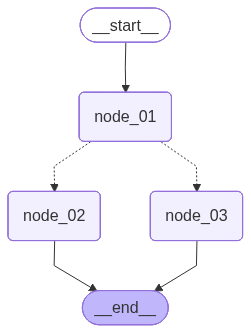

In [38]:
# Display the graph visualization
display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
# save this visualization to file 
# Save visualization to file
graph.get_graph().draw_mermaid_png(output_file_path="graph_visualization.png")
print("Graph saved as 'graph_visualization.png'")

Graph saved as 'graph_visualization.png'


### Step 6: Run the Graph (Complete the Project)

In [41]:
# Function to run the graph multiple times
def run_graph(num_runs=5, initial_msg="start"):
    for i in range(num_runs):
        print(f"\n--- Run {i+1} ---")
        initial_state = {"graph_msg": initial_msg}
        result = graph.invoke(initial_state)
        print(f"Final state: {result['graph_msg']}")

# Run it!
run_graph(num_runs=3, initial_msg="Initial message: ")


--- Run 1 ---
[2025-11-10T18:06:43.752235] Node 01: Initial message: 
[2025-11-10T18:06:43.753442] Selected node: node_02


KeyError: None

SyntaxError: invalid syntax (3838958338.py, line 1)